# DBSCAN

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('archive/Mall_Customers.csv', sep=',')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
Clus_dataSet = df[['Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(df[['Annual Income (k$)','Spending Score (1-100)']].head())
# Number of Labels
print("number of labels: ", set(labels))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
number of labels:  {0, 1, 2, 3, -1}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


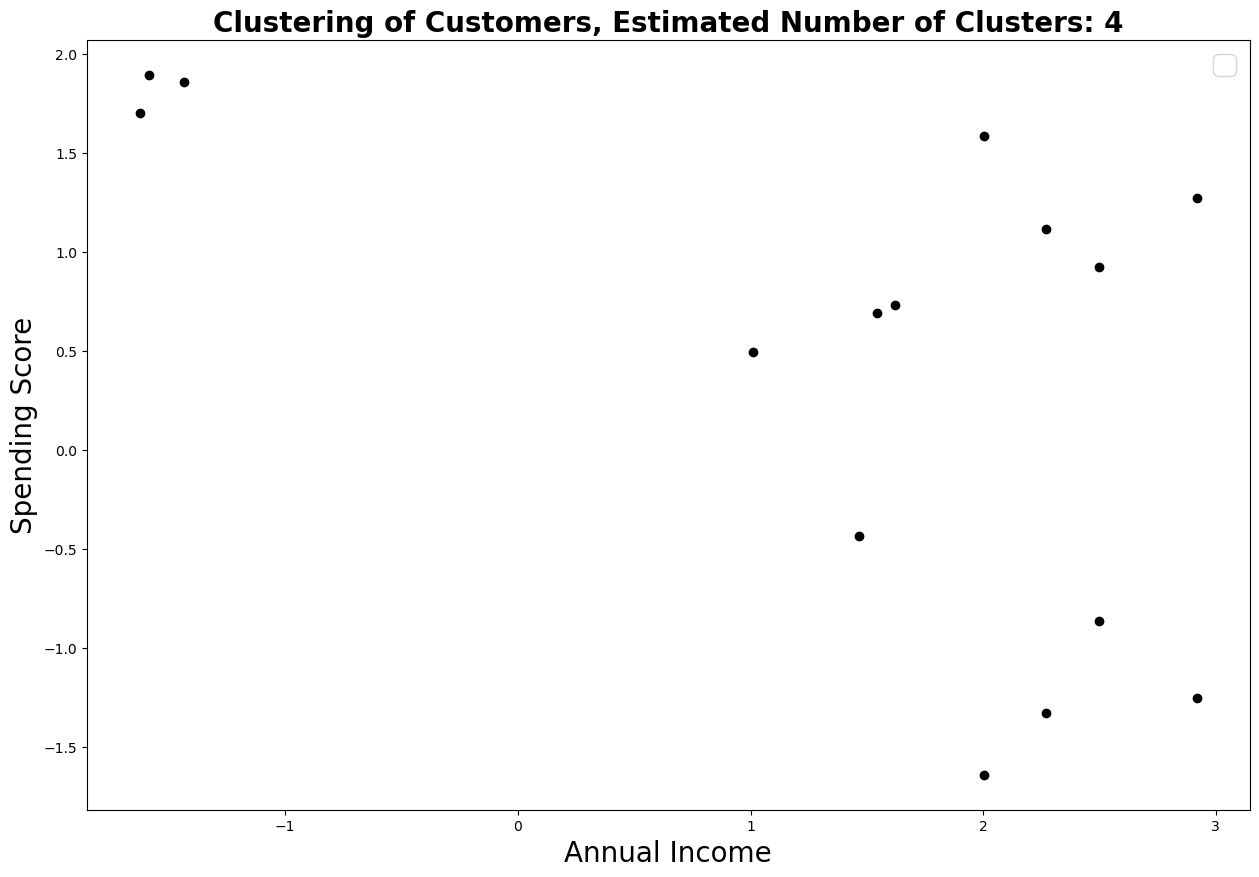

number of noise(s):  15


In [9]:
# Black removed and is used for noise instead
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Clustering of Customers, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [12]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set[['Annual Income (k$)']])))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Annual Income: Annual Income (k$)    48.0
dtype: float64, Avg Spending Score: 52, Count: 114
Cluster 1, Avg Annual Income: Annual Income (k$)    24.0
dtype: float64, Avg Spending Score: 9, Count: 11
Cluster 2, Avg Annual Income: Annual Income (k$)    81.0
dtype: float64, Avg Spending Score: 84, Count: 32
Cluster 3, Avg Annual Income: Annual Income (k$)    84.0
dtype: float64, Avg Spending Score: 14, Count: 27
